<a href="https://colab.research.google.com/github/CarlosSMWolff/Quantum-Optics-Course/blob/main/5_Steady_state_JC_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical steady state solutions of a driven, open JC model

In this notebook we will create our custom functions with numpy to simulate an open quantum system

Load necessary packages

In [ ]:
# Load numpy for matrix operations
import numpy as np
# Load matplotlib to create plots
import matplotlib.pyplot as plt
from numpy import kron, sqrt, log10

from tqdm import tqdm

First we build the quantum operators that we use to describe the states and dynamics of the system.

In this example, we have a cavity (annihilation operator $a$) and a two-level system (lowering operator $\sigma$).

We will use the notation "red" for operators that act on the respective spaces of the cavity or the TLS alone, not in the global space that is a tensor product of both.

## Operators

In [ ]:
# Define the annihilation operator for a single HO
ncav = 5 # Truncation number: i.e. number of levels of the HO included.
ared = np.diag(np.sqrt(np.arange(1,ncav)),k=1)

# Define the annihilation operator for a TLS
sigmared = np.array([[0,1],[0,0]])



Remember that we work in a Hilbert space which is a tensor product of the cavity Hilbert space and the TLS Hilbert space. Therefore, to build the operators we need to also build tensor products of the reduced operators defined above, for instance:

$$a_\text{total} = a_\text{cavity}\otimes I_{\text{TLS}} $$ 
$$\sigma_\text{total} = I_\text{cavity}\otimes \sigma_{\text{TLS}} $$

This tensor product is performed with numpy's Kronecker product ``np.kron``. The identity is created with ``np.eye``.



In [ ]:
# TASK: Write below the operators a and sigma in the composite cavity-qubit space
a = 
sigma = 

hilbertnumber = len(a)
print(f"The size of our combined Hilbert space is {hilbertnumber}")

The size of our combined Hilbert space is 10


# Dissipative dynamics

We will fix a set of parameters similar to those in [Photon blockade in an optical cavity with one trapped atom, Nature 2005
](https://www.nature.com/articles/nature03804)

In [ ]:
g = 1.

Omega = 0.01
kappa = 4.1/33.9
gamma = 2.6/33.9

Delta_a = 0.
Delta_q = 0.


In [ ]:
# TASK: Write a function that returns the Liouvillian term corresponding to a given operator "op"
# Note: We consider the corresponding rate gamma to be absorbed into the definition of op
def lindblad(op):
  return 


# Given a Hamiltonian and a list of collapse operators, we write a function that return the 
# steady state density matrix
def steadystate_np(H,c_ops: list):
 
  h = len(H)
  id = np.eye(h)

  # TASK: Write LH, the Liouvillian corresponding to the Hamiltonian part of the master equation
  LH = 
  L = LH
  for op in c_ops:
    # Now we add the Lindblad terms with the function defined above
    L = L + lindblad(op)

  # Substitute the first row of L by the trace condition
  Lnew = L.copy()
  Lnew[0,:] = (np.eye(h)).flatten()
  ind = np.zeros(h**2); ind[0]=1

  # TASK: Write a line to compute the steady state in vectorized form using np.linalg.solve
  rhoss = 
  rhossM = np.reshape(rhoss,(h,h))
  
  return rhossM

# TASK: Write a function to compute the Hamiltonian in terms of (Delta, g, Omega)
# Qubit and cavity must be resonant, we should have coherent cavity driving
def gen_Hamiltonian(Delta, g, Omega):
  H = 
  return H

In [ ]:
Delta_min, Delta_max, nDelta = -1.5*g, 1.5*g, 300
Delta_grid = np.linspace(Delta_min, Delta_max, nDelta)

In [ ]:
nagrid = []
g2grid = []

for Delta in Delta_grid:

  H = gen_Hamiltonian(Delta, g, Omega)
  rhoSS =  steadystate_np(H, [sqrt(kappa)*a, sqrt(gamma)*sigma] )
  
  # TASK: From rhoSS, compute G2 and na using the expression <O>=Tr[rho*O], use np.trace()
  G2=
  na=

  g2 = G2/na**2
  nagrid.append(na)
  g2grid.append(g2)

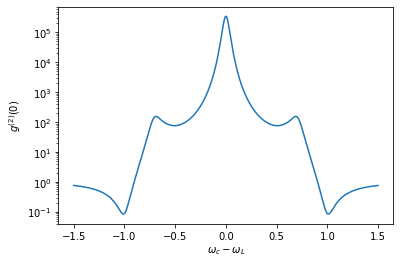

In [ ]:
plt.plot(Delta_grid, np.real(g2grid))
plt.yscale('log')
plt.ylabel('$g^{(2)}(0)$')
plt.xlabel('$\omega_c - \omega_L $')

plt.show()

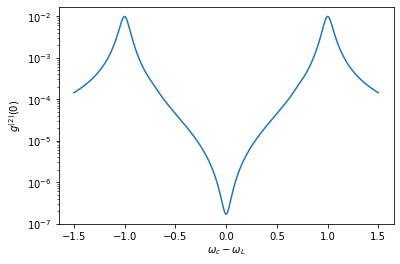

In [ ]:
plt.plot(Delta_grid, np.real(nagrid))
plt.yscale('log')
plt.ylabel('$g^{(2)}(0)$')
plt.xlabel('$\omega_c - \omega_L $')

plt.show()

Population VS Laser detuning and light-matter coupling rate

In [ ]:
kappa = 1; gamma = 0.05; 
Omega = 0.0001; 


def get_qubit_population(Delta, g):
  H = gen_Hamiltonian(Delta, g, Omega)
  rhoSS =  steadystate_np(H, [sqrt(kappa)*a, sqrt(gamma)*sigma] )
  nq=np.trace(sigma.T@sigma@rhoSS)
  return np.real(nq)

In [ ]:
Deltamin, Deltamax, nDelta = -1, 1, 100
Deltagrid = np.linspace(Deltamin,Deltamax, nDelta)
gmin, gmax, ng = 0.05, 1, 50
ggrid = np.logspace(log10(gmin), log10(gmax), ng)

In [ ]:
qubit_pop_array = np.asarray([[ get_qubit_population(Delta,g) for Delta in Deltagrid] for g in tqdm(ggrid) ])
normalization = np.expand_dims(np.max(qubit_pop_array,axis=1),-1)
qubitpop_normalized = qubit_pop_array/normalization

100%|██████████| 50/50 [00:12<00:00,  3.88it/s]


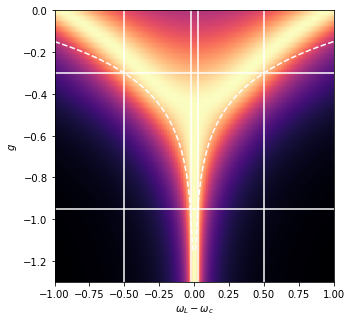

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow((np.flip(qubitpop_normalized,axis=0))**0.5, extent=[Deltamin,Deltamax,log10(gmin),log10(gmax)], aspect = 'auto', cmap = 'magma')
#plt.plot(Deltagrid, np.log10(np.abs(Deltagrid)), 'r--')
ax.plot(Deltagrid, np.log10(sqrt(np.abs(Deltagrid)*kappa/2)), 'w--')

# Bad-cavity limit
ax.axhline(log10(sqrt(kappa*gamma/4)),color='white')
# 
ax.axhline(log10(kappa/2),color='white')

ax.axvline(gamma/2,color='white')
ax.axvline(-gamma/2,color='white')

ax.axvline(kappa/2,color='white')
ax.axvline(-kappa/2,color='white')

plt.ylim(log10(gmin),log10(gmax))
ax.set_xlabel("$\omega_L-\omega_c$")
ax.set_ylabel("$g$")

plt.savefig("plot.pdf")
plt.show()

